## Import modules

In [1]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import numpy.random as random
import pandas as pd
import scanpy as sc
import scvi

Global seed set to 0


In [2]:
import session_info
session_info.show()

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'RdPu',)

## Read in data

In [15]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/8regions/RNA_adult-8reg_raw_rmdblcls_cellstate-annotated.h5ad')
adata

AnnData object with n_obs × n_vars = 629041 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state'
    var: 'gene_name_scRNA-0', 'gene_name_snRNA-1', 'gene_name_multiome-2'
    uns: 'cell_or_nuclei_colors', 'cell_state_HCAv1_colors', 'cell_state_colors', 'cell_state_scNym_colors', 'cell_type_colors', 'donor_colors', 'kit_10x_colors', 'leiden_scVI_colors', 'region_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_continuous', 'latent_gene_encoding'
    obsp: 'connectivities', 'distances'

In [20]:
# subset cardiomyocytes
adata = adata[adata.obs['cell_type'].isin(['Ventricular Cardiomyocyte','Atrial Cardiomyocyte'])]

# set gene name as var_names 
adata.var['gene_id']=adata.var_names.copy()
adata.var.set_index('gene_name_multiome-2',inplace=True)
adata.var_names=adata.var_names.astype('str')
adata.var_names_make_unique()

adata

Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 226971 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state'
    var: 'gene_name_scRNA-0', 'gene_name_snRNA-1', 'gene_id'
    uns: 'cell_or_nuclei_colors', 'cell_state_HCAv1_colors', 'cell_state_colors', 'cell_state_scNym_colors', 'cell_type_colors', 'donor_colors', 'kit_10x_colors', 'leiden_scVI_colors', 'region_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_continuous', 'latent_gene_encoding'
    obsp: 'connectivities', 'distances'

In [21]:
pd.crosstab(adata.obs['cell_state'],adata.obs['region'])

region,SAN,AVN,RA,LA,RV,LV,SP,AX
cell_state,,,,,,,,
aCM1,380,127,3145,13974,0,0,0,0
aCM2,3402,62,7131,1314,0,0,0,0
aCM3,106,106,3166,1800,0,0,0,0
aCM4,946,90,2023,2352,0,0,0,0
aCM5,0,0,14,41,0,0,0,0
SAN_P_cell,47,0,0,0,0,0,0,0
AVN_P_cell,0,154,0,0,0,0,0,0
AVN_bundle_cell,0,42,0,0,0,0,0,0
vCM1,0,5083,0,0,13644,38277,23754,16780


## Run scVI for all subsets

In [13]:
regions= ['AX','SP','LV','RV','AX-AVN','SP-AVN','LV-AVN','RV-AVN']

In [11]:
'AX-AVN'.split('-')

['AX', 'AVN']

##### AX #####
(28323, 32732)
{'Ventricular Cardiomyocyte'}
[1. 1. 1. 1. 1. 1. 4. 9. 1. 2.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 7 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key


INFO     Successfully registered anndata object containing 28323 cells, 32732 vars, 20       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 28323 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  20   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                            
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃      Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │  D1_Nuclei_3prime-v2  │          0          │
│                        │  D2_Nuclei_3prime-v2  │          1          │
│                        │   D3_Cell_3prime-v2   │          2          │
│                        │  D3_Nuclei_3prime-v2  │          3          │
│                        │  D4_Nuclei_3prime-v2  │          4          │
│                        │   D5_Cell_3prime-v2   │          5          │
│                        │  D5_Nuclei_3prime-v2  │          6          │
│                        │   D6_Cell_3prime-v2   │          7          │
│                        │  D6_Nuclei_3prime-v2  │          8          │
│                        │   D7_Cell_3prime-v2   │          9          │
│                        │  D7_Nuclei_3prime-v2  │         10          │
│                        │ D8_Nuclei_Multiome-v1 │         11          │
│                        │  D11_Cell_3prime-v3   │         12          │
│                        │ D11_Nuclei_3prime-v3  │         13          │
│                        │  H2_Nuclei_3prime-v3  │         14          │
│                        │  H3_Nuclei_3prime-v3  │         15          │
│                        │  H4_Nuclei_3prime-v3  │         16          │
│                        │  H5_Nuclei_3prime-v3  │         17          │
│                        │  H6_Nuclei_3prime-v3  │         18          │
│                        │  H7_Nuclei_3prime-v3  │         19          │
└────────────────────────┴───────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 115168        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.790576934814453125 │
│ adata.obs['pct_counts_ribo'] │  0 -> 17.9338836669921875  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 282/282: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 282/282 [20:17<00:00,  4.32s/it, loss=5.67e+03, v_num=1]


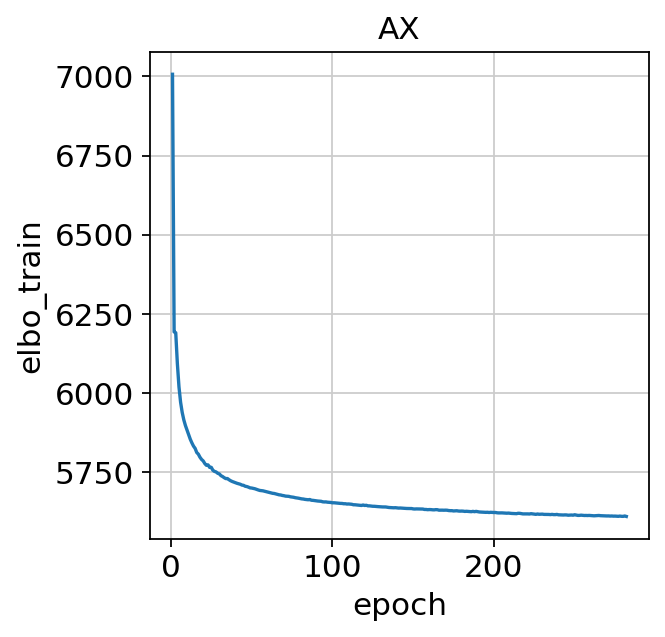

##### SP #####
(39482, 32732)
{'Ventricular Cardiomyocyte'}
[ 1.  4.  6. 10. 38.  1.  1.  1.  1.  1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 39482 cells, 32732 vars, 19       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 39482 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  19   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ AH1_Nuclei_Multiome-v1 │          0          │
│                        │  D2_Nuclei_3prime-v2   │          1          │
│                        │  D3_Nuclei_3prime-v2   │          2          │
│                        │   D4_Cell_3prime-v2    │          3          │
│                        │  D4_Nuclei_3prime-v2   │          4          │
│                        │  D5_Nuclei_3prime-v2   │          5          │
│                        │   D6_Cell_3prime-v2    │          6          │
│                        │  D6_Nuclei_3prime-v2   │          7          │
│                        │   D7_Cell_3prime-v2    │          8          │
│                        │  D7_Nuclei_3prime-v2   │          9          │
│                        │ D8_Nuclei_Multiome-v1  │         10          │
│                        │   D11_Cell_3prime-v3   │         11          │
│                        │  D11_Nuclei_3prime-v3  │         12          │
│                        │  H2_Nuclei_3prime-v3   │         13          │
│                        │  H3_Nuclei_3prime-v3   │         14          │
│                        │  H4_Nuclei_3prime-v3   │         15          │
│                        │  H5_Nuclei_3prime-v3   │         16          │
│                        │  H6_Nuclei_3prime-v3   │         17          │
│                        │  H7_Nuclei_3prime-v3   │         18          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 98645        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.967662811279296875 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 18.339099884033203125 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 203/203: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [20:08<00:00,  5.95s/it, loss=5.24e+03, v_num=1]


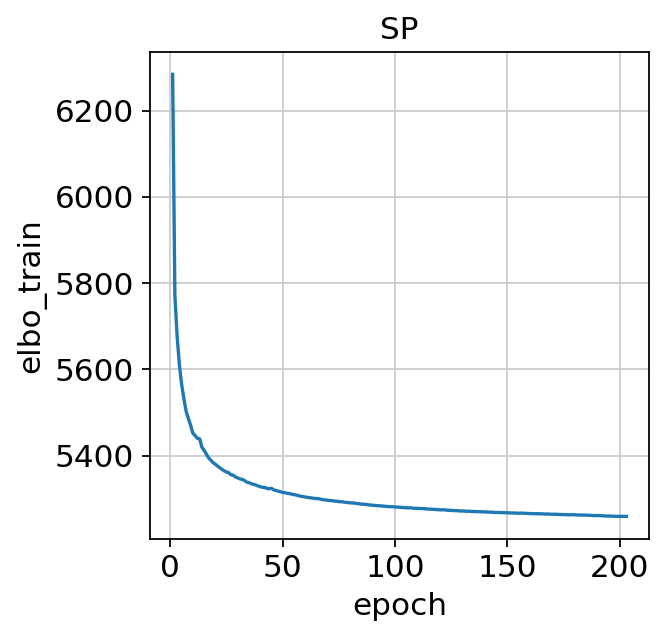

##### LV #####
(65547, 32732)
{'Ventricular Cardiomyocyte'}
[8. 2. 1. 1. 1. 3. 1. 2. 1. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 7 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key


INFO     Successfully registered anndata object containing 65547 cells, 32732 vars, 22       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 65547 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  22   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ AH1_Nuclei_Multiome-v1 │          0          │
│                        │  D1_Nuclei_3prime-v2   │          1          │
│                        │  D2_Nuclei_3prime-v2   │          2          │
│                        │   D3_Cell_3prime-v2    │          3          │
│                        │  D3_Nuclei_3prime-v2   │          4          │
│                        │ D3_Nuclei_Multiome-v1  │          5          │
│                        │  D4_Nuclei_3prime-v2   │          6          │
│                        │   D5_Cell_3prime-v2    │          7          │
│                        │  D5_Nuclei_3prime-v2   │          8          │
│                        │  D6_Nuclei_3prime-v2   │          9          │
│                        │   D7_Cell_3prime-v2    │         10          │
│                        │  D7_Nuclei_3prime-v2   │         11          │
│                        │ D7_Nuclei_Multiome-v1  │         12          │
│                        │ D8_Nuclei_Multiome-v1  │         13          │
│                        │   D11_Cell_3prime-v3   │         14          │
│                        │  D11_Nuclei_3prime-v3  │         15          │
│                        │  H2_Nuclei_3prime-v3   │         16          │
│                        │  H3_Nuclei_3prime-v3   │         17          │
│                        │  H4_Nuclei_3prime-v3   │         18          │
│                        │  H5_Nuclei_3prime-v3   │         19          │
│                        │  H6_Nuclei_3prime-v3   │         20          │
│                        │  H7_Nuclei_3prime-v3   │         21          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       501 -> 135475        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.700550079345703125 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 17.72151947021484375  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 122/122: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 122/122 [20:19<00:00,  9.99s/it, loss=6.08e+03, v_num=1]


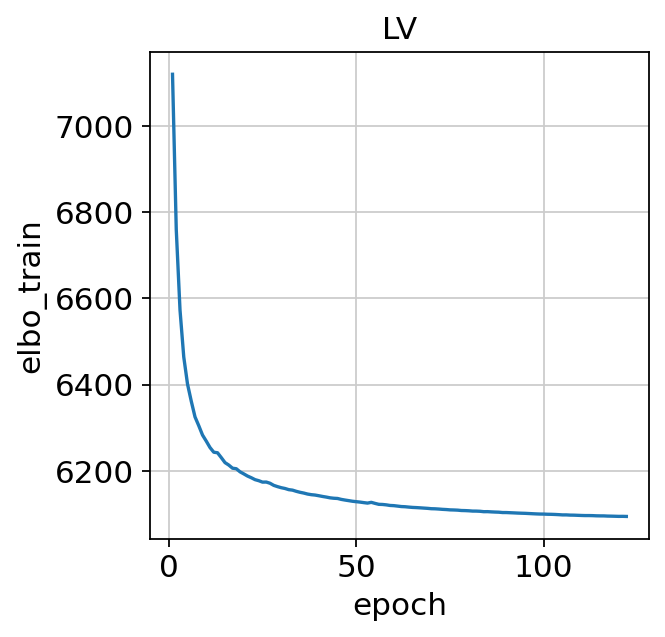

##### RV #####
(42154, 32732)
{'Ventricular Cardiomyocyte'}
[ 1. 12. 45. 54.  4. 42. 29.  3.  2.  6.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 42154 cells, 32732 vars, 22       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 42154 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  22   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ AH1_Nuclei_Multiome-v1 │          0          │
│                        │  D1_Nuclei_3prime-v2   │          1          │
│                        │  D2_Nuclei_3prime-v2   │          2          │
│                        │  D3_Nuclei_3prime-v2   │          3          │
│                        │   D4_Cell_3prime-v2    │          4          │
│                        │  D4_Nuclei_3prime-v2   │          5          │
│                        │   D5_Cell_3prime-v2    │          6          │
│                        │  D5_Nuclei_3prime-v2   │          7          │
│                        │   D6_Cell_3prime-v2    │          8          │
│                        │   D6_Cell_3prime-v3    │          9          │
│                        │  D6_Nuclei_3prime-v2   │         10          │
│                        │   D7_Cell_3prime-v2    │         11          │
│                        │  D7_Nuclei_3prime-v2   │         12          │
│                        │ D8_Nuclei_Multiome-v1  │         13          │
│                        │   D11_Cell_3prime-v3   │         14          │
│                        │  D11_Nuclei_3prime-v3  │         15          │
│                        │  H2_Nuclei_3prime-v3   │         16          │
│                        │  H3_Nuclei_3prime-v3   │         17          │
│                        │  H4_Nuclei_3prime-v3   │         18          │
│                        │  H5_Nuclei_3prime-v3   │         19          │
│                        │  H6_Nuclei_3prime-v3   │         20          │
│                        │  H7_Nuclei_3prime-v3   │         21          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 86955        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.844835281372070312 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 14.888628005981445312 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 190/190: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190/190 [20:24<00:00,  6.44s/it, loss=5.33e+03, v_num=1]


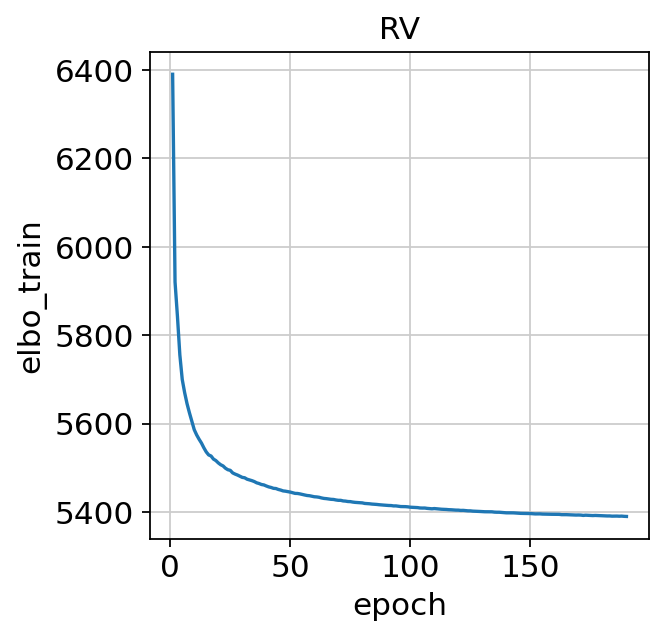

##### AX-AVN #####
(39026, 32732)
{'Ventricular Cardiomyocyte'}
[1. 1. 1. 1. 1. 1. 4. 9. 1. 2.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 9 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key


INFO     Successfully registered anndata object containing 39026 cells, 32732 vars, 22       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 39026 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  22   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │  D4_Nuclei_3prime-v2   │          6          │
│                        │   D5_Cell_3prime-v2    │          7          │
│                        │  D5_Nuclei_3prime-v2   │          8          │
│                        │   D6_Cell_3prime-v2    │          9          │
│                        │  D6_Nuclei_3prime-v2   │         10          │
│                        │   D7_Cell_3prime-v2    │         11          │
│                        │  D7_Nuclei_3prime-v2   │         12          │
│                        │ D8_Nuclei_Multiome-v1  │         13          │
│                        │   D11_Cell_3prime-v3   │         14          │
│                        │  D11_Nuclei_3prime-v3  │         15          │
│                        │  H2_Nuclei_3prime-v3   │         16          │
│                        │  H3_Nuclei_3prime-v3   │         17          │
│                        │  H4_Nuclei_3prime-v3   │         18          │
│                        │  H5_Nuclei_3prime-v3   │         19          │
│                        │  H6_Nuclei_3prime-v3   │         20          │
│                        │  H7_Nuclei_3prime-v3   │         21          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 115168        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.790576934814453125 │
│ adata.obs['pct_counts_ribo'] │  0 -> 17.9338836669921875  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 205/205: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 205/205 [20:29<00:00,  6.00s/it, loss=6.19e+03, v_num=1]


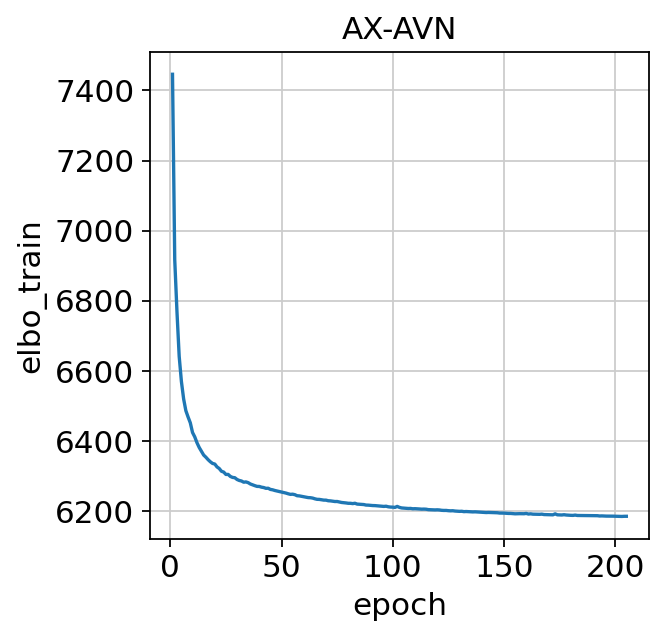

##### SP-AVN #####
(50185, 32732)
{'Ventricular Cardiomyocyte'}
[ 1.  4.  6. 10. 38.  1.  1.  1.  1.  1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 50185 cells, 32732 vars, 20       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 50185 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  20   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D2_Nuclei_3prime-v2   │          2          │
│                        │  D3_Nuclei_3prime-v2   │          3          │
│                        │   D4_Cell_3prime-v2    │          4          │
│                        │  D4_Nuclei_3prime-v2   │          5          │
│                        │  D5_Nuclei_3prime-v2   │          6          │
│                        │   D6_Cell_3prime-v2    │          7          │
│                        │  D6_Nuclei_3prime-v2   │          8          │
│                        │   D7_Cell_3prime-v2    │          9          │
│                        │  D7_Nuclei_3prime-v2   │         10          │
│                        │ D8_Nuclei_Multiome-v1  │         11          │
│                        │   D11_Cell_3prime-v3   │         12          │
│                        │  D11_Nuclei_3prime-v3  │         13          │
│                        │  H2_Nuclei_3prime-v3   │         14          │
│                        │  H3_Nuclei_3prime-v3   │         15          │
│                        │  H4_Nuclei_3prime-v3   │         16          │
│                        │  H5_Nuclei_3prime-v3   │         17          │
│                        │  H6_Nuclei_3prime-v3   │         18          │
│                        │  H7_Nuclei_3prime-v3   │         19          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 98645        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.967662811279296875 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 18.339099884033203125 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 159/159: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159/159 [20:16<00:00,  7.65s/it, loss=5.76e+03, v_num=1]


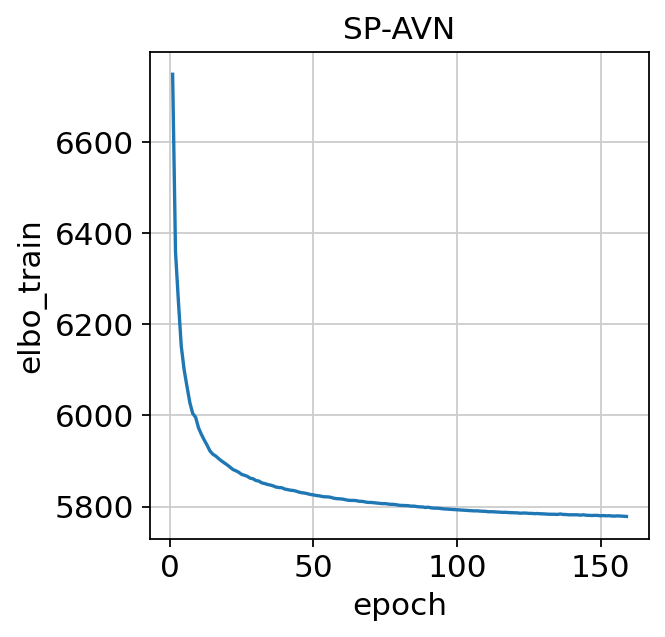

##### LV-AVN #####
(76250, 32732)
{'Ventricular Cardiomyocyte'}
[8. 2. 1. 1. 1. 3. 1. 2. 1. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 8 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key


INFO     Successfully registered anndata object containing 76250 cells, 32732 vars, 23       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 76250 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  23   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │ D3_Nuclei_Multiome-v1  │          6          │
│                        │  D4_Nuclei_3prime-v2   │          7          │
│                        │   D5_Cell_3prime-v2    │          8          │
│                        │  D5_Nuclei_3prime-v2   │          9          │
│                        │  D6_Nuclei_3prime-v2   │         10          │
│                        │   D7_Cell_3prime-v2    │         11          │
│                        │  D7_Nuclei_3prime-v2   │         12          │
│                        │ D7_Nuclei_Multiome-v1  │         13          │
│                        │ D8_Nuclei_Multiome-v1  │         14          │
│                        │   D11_Cell_3prime-v3   │         15          │
│                        │  D11_Nuclei_3prime-v3  │         16          │
│                        │  H2_Nuclei_3prime-v3   │         17          │
│                        │  H3_Nuclei_3prime-v3   │         18          │
│                        │  H4_Nuclei_3prime-v3   │         19          │
│                        │  H5_Nuclei_3prime-v3   │         20          │
│                        │  H6_Nuclei_3prime-v3   │         21          │
│                        │  H7_Nuclei_3prime-v3   │         22          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 135475        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.700550079345703125 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 17.72151947021484375  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 105/105: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [20:26<00:00, 11.68s/it, loss=6.31e+03, v_num=1]


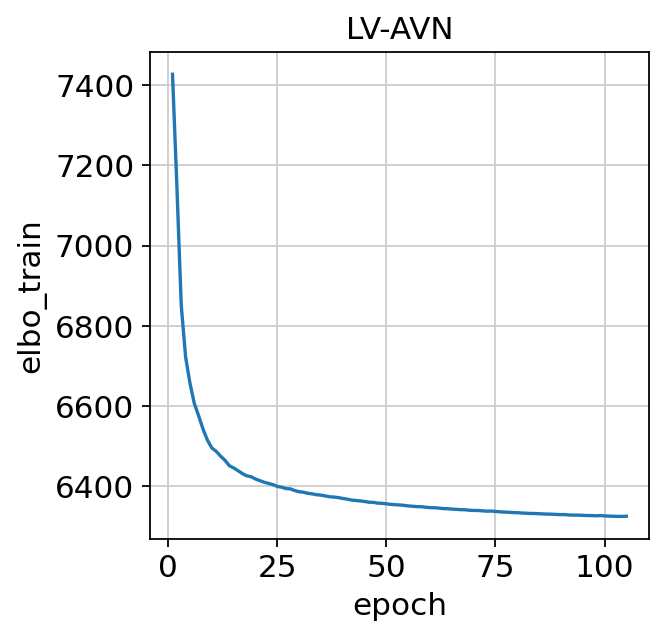

##### RV-AVN #####
(52857, 32732)
{'Ventricular Cardiomyocyte'}
[ 1. 12. 45. 54.  4. 42. 29.  3.  2.  6.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 52857 cells, 32732 vars, 23       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 52857 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  23   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │  D3_Nuclei_3prime-v2   │          4          │
│                        │   D4_Cell_3prime-v2    │          5          │
│                        │  D4_Nuclei_3prime-v2   │          6          │
│                        │   D5_Cell_3prime-v2    │          7          │
│                        │  D5_Nuclei_3prime-v2   │          8          │
│                        │   D6_Cell_3prime-v2    │          9          │
│                        │   D6_Cell_3prime-v3    │         10          │
│                        │  D6_Nuclei_3prime-v2   │         11          │
│                        │   D7_Cell_3prime-v2    │         12          │
│                        │  D7_Nuclei_3prime-v2   │         13          │
│                        │ D8_Nuclei_Multiome-v1  │         14          │
│                        │   D11_Cell_3prime-v3   │         15          │
│                        │  D11_Nuclei_3prime-v3  │         16          │
│                        │  H2_Nuclei_3prime-v3   │         17          │
│                        │  H3_Nuclei_3prime-v3   │         18          │
│                        │  H4_Nuclei_3prime-v3   │         19          │
│                        │  H5_Nuclei_3prime-v3   │         20          │
│                        │  H6_Nuclei_3prime-v3   │         21          │
│                        │  H7_Nuclei_3prime-v3   │         22          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 86955        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.844835281372070312 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 14.888628005981445312 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 151/151: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [20:20<00:00,  8.08s/it, loss=5.77e+03, v_num=1]


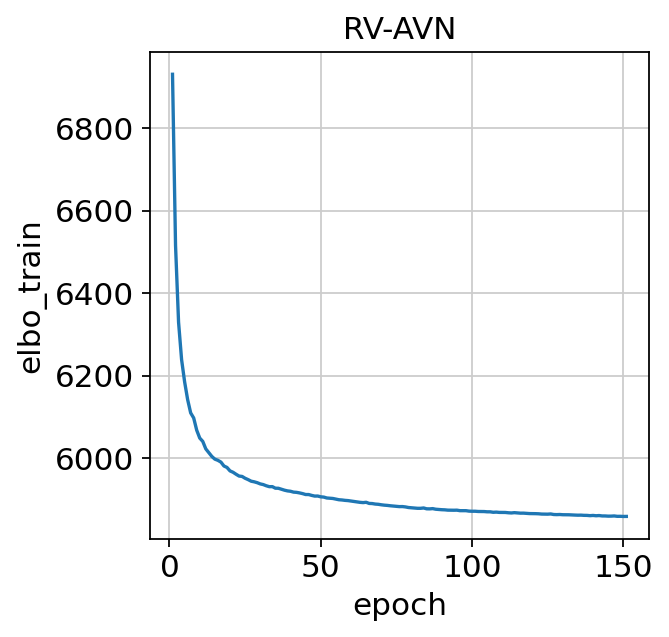

CPU times: user 11h 56min 25s, sys: 7min 12s, total: 12h 3min 38s
Wall time: 2h 50min 23s


<Figure size 320x320 with 0 Axes>

In [23]:
%%time
# Only ventricle
adata_v = adata[adata.obs['cell_type'].isin(['Ventricular Cardiomyocyte'])]

for reg in regions:
    print(f'##### {reg} #####')
    
    if '-AVN' in reg:
        adata_sub = adata_v[adata_v.obs['region'].isin(reg.split('-'))]
    else:
        adata_sub = adata_v[adata_v.obs['region']==reg]
    
    adata_sub = adata_sub.copy()
    print(adata_sub.shape)
    print(set(adata_sub.obs['cell_type']))
    print(adata_sub.X.data[:10])
    
    # setup anndata for scVI
    scvi.model.SCVI.setup_anndata(adata_sub, 
                              # layer="counts", 
                              batch_key="batch_key",
                              continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])
    scvi.data.view_anndata_setup(adata_sub)
    
    # Creating and training a model
    vae = scvi.model.SCVI(adata_sub, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
    
    # train
    vae.train()
    
    # save scvi model
    # vae.save(f'/nfs/team205/heart/anndata_objects/8regions/scVI/models/{reg}_vCM_allgene/',overwrite=True)
    
    # Convergence plot
    x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
    plt.plot(x, vae.history['elbo_train'], label="train")
    plt.title(reg)
    plt.xlabel('epoch')
    plt.ylabel('elbo_train')
    plt.show()
    plt.clf()
    
    # add the latent space to adata
    adata_sub.obsm["X_scVI"] = vae.get_latent_representation()
    
    # store the normalized expression values in the anndata
    adata_sub.layers["scvi_normalized"] = vae.get_normalized_expression(library_size=10e4)
    
    # save post-scVI data
    adata_sub.write(f'/nfs/team205/heart/anndata_objects/8regions/scVI/for_Purkinje/vCM_only/{reg}_vCM_post-scVI.h5ad')
    
    del adata_sub, vae

##### AX #####
(28328, 32732)
{'Ventricular Cardiomyocyte', 'Atrial Cardiomyocyte'}
[1. 1. 1. 1. 1. 1. 4. 9. 1. 2.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 7 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key


INFO     Successfully registered anndata object containing 28328 cells, 32732 vars, 20       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 28328 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  20   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                            
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃      Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │  D1_Nuclei_3prime-v2  │          0          │
│                        │  D2_Nuclei_3prime-v2  │          1          │
│                        │   D3_Cell_3prime-v2   │          2          │
│                        │  D3_Nuclei_3prime-v2  │          3          │
│                        │  D4_Nuclei_3prime-v2  │          4          │
│                        │   D5_Cell_3prime-v2   │          5          │
│                        │  D5_Nuclei_3prime-v2  │          6          │
│                        │   D6_Cell_3prime-v2   │          7          │
│                        │  D6_Nuclei_3prime-v2  │          8          │
│                        │   D7_Cell_3prime-v2   │          9          │
│                        │  D7_Nuclei_3prime-v2  │         10          │
│                        │ D8_Nuclei_Multiome-v1 │         11          │
│                        │  D11_Cell_3prime-v3   │         12          │
│                        │ D11_Nuclei_3prime-v3  │         13          │
│                        │  H2_Nuclei_3prime-v3  │         14          │
│                        │  H3_Nuclei_3prime-v3  │         15          │
│                        │  H4_Nuclei_3prime-v3  │         16          │
│                        │  H5_Nuclei_3prime-v3  │         17          │
│                        │  H6_Nuclei_3prime-v3  │         18          │
│                        │  H7_Nuclei_3prime-v3  │         19          │
└────────────────────────┴───────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 115168        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.790576934814453125 │
│ adata.obs['pct_counts_ribo'] │  0 -> 17.9338836669921875  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 282/282: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 282/282 [20:17<00:00,  4.32s/it, loss=5.63e+03, v_num=1]


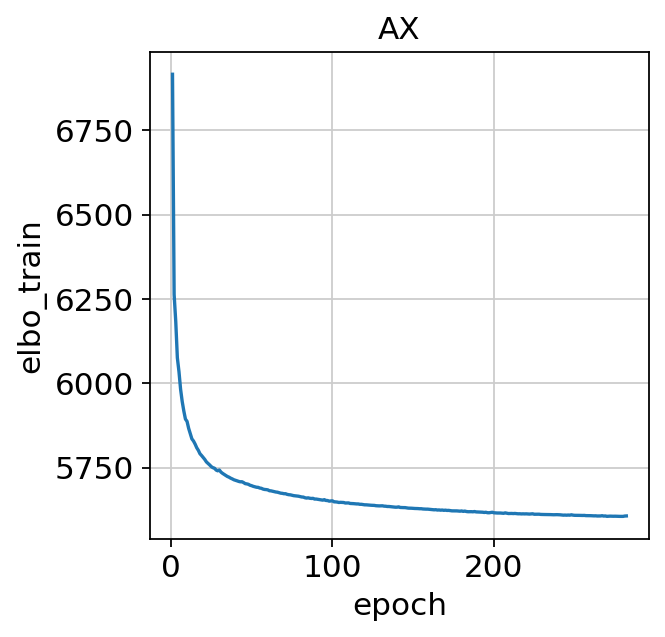

##### SP #####
(39544, 32732)
{'Ventricular Cardiomyocyte', 'Atrial Cardiomyocyte'}
[ 1.  4.  6. 10. 38.  1.  1.  1.  1.  1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 39544 cells, 32732 vars, 19       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 39544 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  19   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ AH1_Nuclei_Multiome-v1 │          0          │
│                        │  D2_Nuclei_3prime-v2   │          1          │
│                        │  D3_Nuclei_3prime-v2   │          2          │
│                        │   D4_Cell_3prime-v2    │          3          │
│                        │  D4_Nuclei_3prime-v2   │          4          │
│                        │  D5_Nuclei_3prime-v2   │          5          │
│                        │   D6_Cell_3prime-v2    │          6          │
│                        │  D6_Nuclei_3prime-v2   │          7          │
│                        │   D7_Cell_3prime-v2    │          8          │
│                        │  D7_Nuclei_3prime-v2   │          9          │
│                        │ D8_Nuclei_Multiome-v1  │         10          │
│                        │   D11_Cell_3prime-v3   │         11          │
│                        │  D11_Nuclei_3prime-v3  │         12          │
│                        │  H2_Nuclei_3prime-v3   │         13          │
│                        │  H3_Nuclei_3prime-v3   │         14          │
│                        │  H4_Nuclei_3prime-v3   │         15          │
│                        │  H5_Nuclei_3prime-v3   │         16          │
│                        │  H6_Nuclei_3prime-v3   │         17          │
│                        │  H7_Nuclei_3prime-v3   │         18          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 98645        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.967662811279296875 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 18.339099884033203125 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 202/202: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202/202 [20:22<00:00,  6.05s/it, loss=5.35e+03, v_num=1]


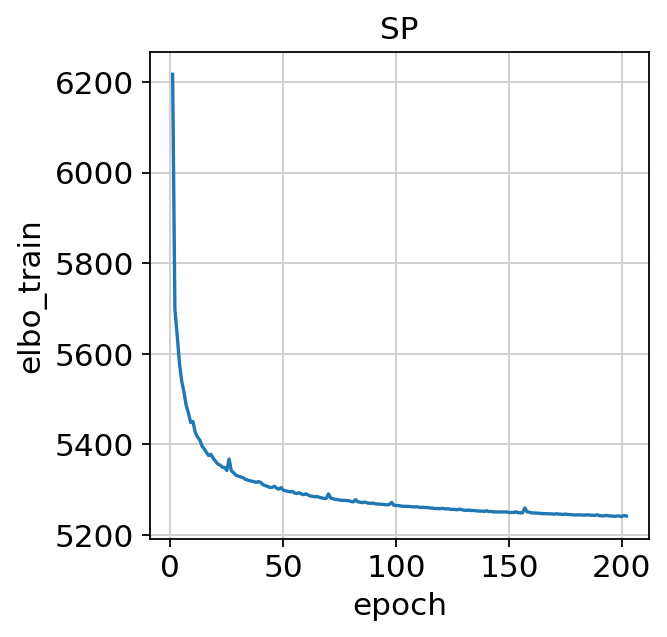

##### LV #####
(65571, 32732)
{'Ventricular Cardiomyocyte', 'Atrial Cardiomyocyte'}
[8. 2. 1. 1. 1. 3. 1. 2. 1. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 7 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key


INFO     Successfully registered anndata object containing 65571 cells, 32732 vars, 22       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 65571 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  22   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ AH1_Nuclei_Multiome-v1 │          0          │
│                        │  D1_Nuclei_3prime-v2   │          1          │
│                        │  D2_Nuclei_3prime-v2   │          2          │
│                        │   D3_Cell_3prime-v2    │          3          │
│                        │  D3_Nuclei_3prime-v2   │          4          │
│                        │ D3_Nuclei_Multiome-v1  │          5          │
│                        │  D4_Nuclei_3prime-v2   │          6          │
│                        │   D5_Cell_3prime-v2    │          7          │
│                        │  D5_Nuclei_3prime-v2   │          8          │
│                        │  D6_Nuclei_3prime-v2   │          9          │
│                        │   D7_Cell_3prime-v2    │         10          │
│                        │  D7_Nuclei_3prime-v2   │         11          │
│                        │ D7_Nuclei_Multiome-v1  │         12          │
│                        │ D8_Nuclei_Multiome-v1  │         13          │
│                        │   D11_Cell_3prime-v3   │         14          │
│                        │  D11_Nuclei_3prime-v3  │         15          │
│                        │  H2_Nuclei_3prime-v3   │         16          │
│                        │  H3_Nuclei_3prime-v3   │         17          │
│                        │  H4_Nuclei_3prime-v3   │         18          │
│                        │  H5_Nuclei_3prime-v3   │         19          │
│                        │  H6_Nuclei_3prime-v3   │         20          │
│                        │  H7_Nuclei_3prime-v3   │         21          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 135475        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.700550079345703125 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 17.72151947021484375  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 122/122: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 122/122 [20:28<00:00, 10.07s/it, loss=6.04e+03, v_num=1]


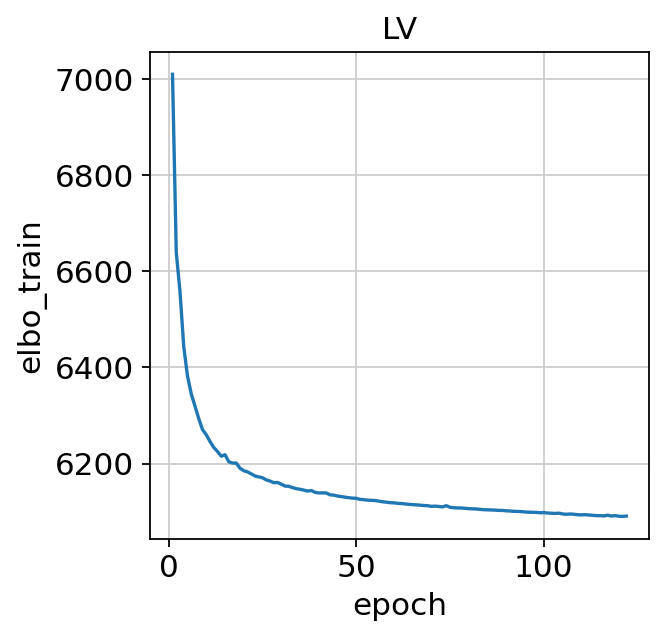

##### RV #####
(42169, 32732)
{'Ventricular Cardiomyocyte', 'Atrial Cardiomyocyte'}
[ 1. 12. 45. 54.  4. 42. 29.  3.  2.  6.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 42169 cells, 32732 vars, 22       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 42169 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  22   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ AH1_Nuclei_Multiome-v1 │          0          │
│                        │  D1_Nuclei_3prime-v2   │          1          │
│                        │  D2_Nuclei_3prime-v2   │          2          │
│                        │  D3_Nuclei_3prime-v2   │          3          │
│                        │   D4_Cell_3prime-v2    │          4          │
│                        │  D4_Nuclei_3prime-v2   │          5          │
│                        │   D5_Cell_3prime-v2    │          6          │
│                        │  D5_Nuclei_3prime-v2   │          7          │
│                        │   D6_Cell_3prime-v2    │          8          │
│                        │   D6_Cell_3prime-v3    │          9          │
│                        │  D6_Nuclei_3prime-v2   │         10          │
│                        │   D7_Cell_3prime-v2    │         11          │
│                        │  D7_Nuclei_3prime-v2   │         12          │
│                        │ D8_Nuclei_Multiome-v1  │         13          │
│                        │   D11_Cell_3prime-v3   │         14          │
│                        │  D11_Nuclei_3prime-v3  │         15          │
│                        │  H2_Nuclei_3prime-v3   │         16          │
│                        │  H3_Nuclei_3prime-v3   │         17          │
│                        │  H4_Nuclei_3prime-v3   │         18          │
│                        │  H5_Nuclei_3prime-v3   │         19          │
│                        │  H6_Nuclei_3prime-v3   │         20          │
│                        │  H7_Nuclei_3prime-v3   │         21          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 86955        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.844835281372070312 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 14.888628005981445312 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 190/190: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190/190 [20:28<00:00,  6.47s/it, loss=5.27e+03, v_num=1]


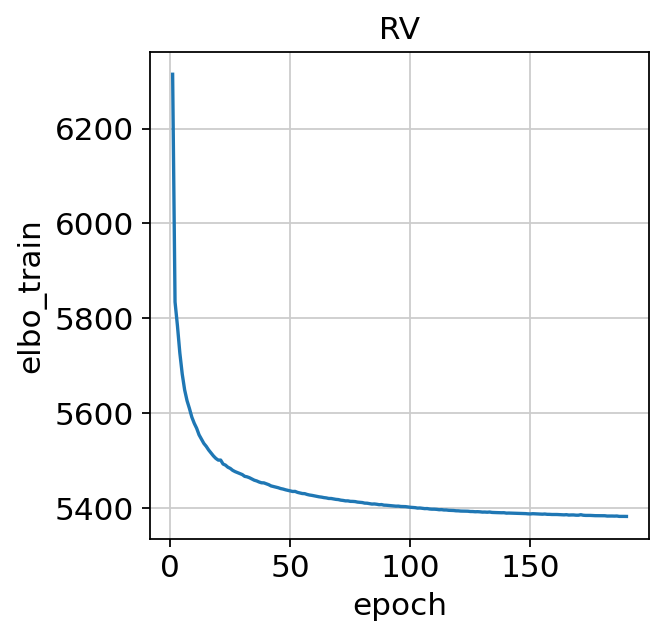

##### AX-AVN #####
(39592, 32732)
{'Ventricular Cardiomyocyte', 'Atrial Cardiomyocyte'}
[1. 1. 1. 1. 1. 1. 4. 9. 1. 2.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 9 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key


INFO     Successfully registered anndata object containing 39592 cells, 32732 vars, 22       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 39592 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  22   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │  D4_Nuclei_3prime-v2   │          6          │
│                        │   D5_Cell_3prime-v2    │          7          │
│                        │  D5_Nuclei_3prime-v2   │          8          │
│                        │   D6_Cell_3prime-v2    │          9          │
│                        │  D6_Nuclei_3prime-v2   │         10          │
│                        │   D7_Cell_3prime-v2    │         11          │
│                        │  D7_Nuclei_3prime-v2   │         12          │
│                        │ D8_Nuclei_Multiome-v1  │         13          │
│                        │   D11_Cell_3prime-v3   │         14          │
│                        │  D11_Nuclei_3prime-v3  │         15          │
│                        │  H2_Nuclei_3prime-v3   │         16          │
│                        │  H3_Nuclei_3prime-v3   │         17          │
│                        │  H4_Nuclei_3prime-v3   │         18          │
│                        │  H5_Nuclei_3prime-v3   │         19          │
│                        │  H6_Nuclei_3prime-v3   │         20          │
│                        │  H7_Nuclei_3prime-v3   │         21          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 148181        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.790576934814453125 │
│ adata.obs['pct_counts_ribo'] │  0 -> 17.9338836669921875  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 202/202: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202/202 [20:29<00:00,  6.09s/it, loss=6.19e+03, v_num=1]


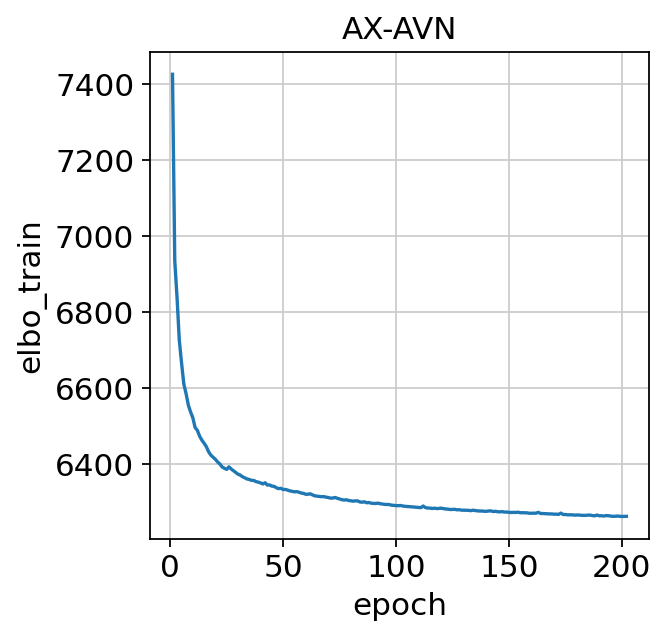

##### SP-AVN #####
(50808, 32732)
{'Ventricular Cardiomyocyte', 'Atrial Cardiomyocyte'}
[ 1.  4.  6. 10. 38.  1.  1.  1.  1.  1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 50808 cells, 32732 vars, 20       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 50808 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  20   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D2_Nuclei_3prime-v2   │          2          │
│                        │  D3_Nuclei_3prime-v2   │          3          │
│                        │   D4_Cell_3prime-v2    │          4          │
│                        │  D4_Nuclei_3prime-v2   │          5          │
│                        │  D5_Nuclei_3prime-v2   │          6          │
│                        │   D6_Cell_3prime-v2    │          7          │
│                        │  D6_Nuclei_3prime-v2   │          8          │
│                        │   D7_Cell_3prime-v2    │          9          │
│                        │  D7_Nuclei_3prime-v2   │         10          │
│                        │ D8_Nuclei_Multiome-v1  │         11          │
│                        │   D11_Cell_3prime-v3   │         12          │
│                        │  D11_Nuclei_3prime-v3  │         13          │
│                        │  H2_Nuclei_3prime-v3   │         14          │
│                        │  H3_Nuclei_3prime-v3   │         15          │
│                        │  H4_Nuclei_3prime-v3   │         16          │
│                        │  H5_Nuclei_3prime-v3   │         17          │
│                        │  H6_Nuclei_3prime-v3   │         18          │
│                        │  H7_Nuclei_3prime-v3   │         19          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 148181        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.967662811279296875 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 18.339099884033203125 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 157/157: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [20:19<00:00,  7.77s/it, loss=5.86e+03, v_num=1]


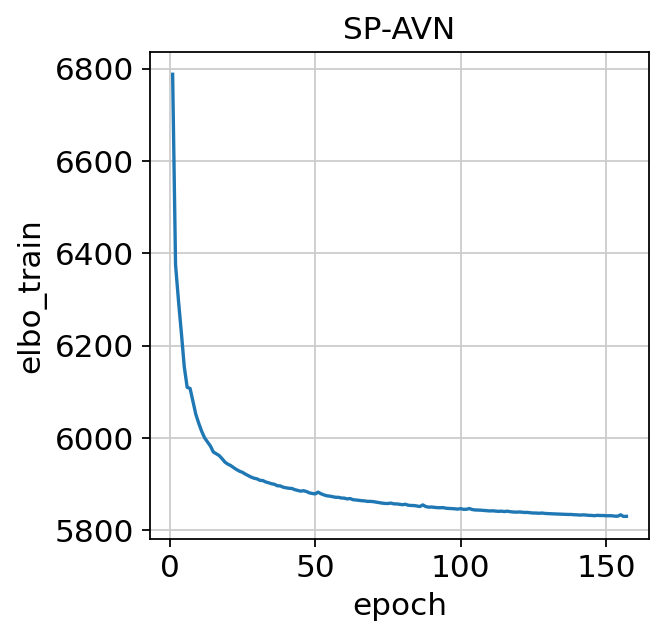

##### LV-AVN #####
(76835, 32732)
{'Ventricular Cardiomyocyte', 'Atrial Cardiomyocyte'}
[8. 2. 1. 1. 1. 3. 1. 2. 1. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 8 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key


INFO     Successfully registered anndata object containing 76835 cells, 32732 vars, 23       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 76835 │
│             Vars             │ 32732 │
│            Labels            │   1   │
│           Batches            │  23   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │ D3_Nuclei_Multiome-v1  │          6          │
│                        │  D4_Nuclei_3prime-v2   │          7          │
│                        │   D5_Cell_3prime-v2    │          8          │
│                        │  D5_Nuclei_3prime-v2   │          9          │
│                        │  D6_Nuclei_3prime-v2   │         10          │
│                        │   D7_Cell_3prime-v2    │         11          │
│                        │  D7_Nuclei_3prime-v2   │         12          │
│                        │ D7_Nuclei_Multiome-v1  │         13          │
│                        │ D8_Nuclei_Multiome-v1  │         14          │
│                        │   D11_Cell_3prime-v3   │         15          │
│                        │  D11_Nuclei_3prime-v3  │         16          │
│                        │  H2_Nuclei_3prime-v3   │         17          │
│                        │  H3_Nuclei_3prime-v3   │         18          │
│                        │  H4_Nuclei_3prime-v3   │         19          │
│                        │  H5_Nuclei_3prime-v3   │         20          │
│                        │  H6_Nuclei_3prime-v3   │         21          │
│                        │  H7_Nuclei_3prime-v3   │         22          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 148181        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.700550079345703125 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 17.72151947021484375  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 104/104: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104/104 [20:29<00:00, 11.82s/it, loss=6.42e+03, v_num=1]


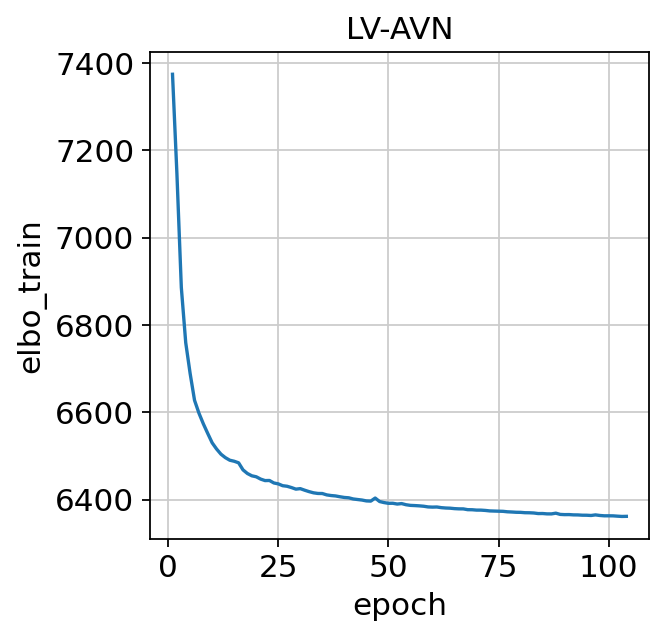

In [ ]:
%%time
# Both ventricle and atrial

for reg in regions:
    print(f'##### {reg} #####')
    
    if '-AVN' in reg:
        adata_sub = adata[adata.obs['region'].isin(reg.split('-'))]
    else:
        adata_sub = adata[adata.obs['region']==reg]
    
    adata_sub = adata_sub.copy()
    print(adata_sub.shape)
    print(set(adata_sub.obs['cell_type']))
    print(adata_sub.X.data[:10])
    
    # setup anndata for scVI
    scvi.model.SCVI.setup_anndata(adata_sub, 
                              # layer="counts", 
                              batch_key="batch_key",
                              continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])
    scvi.data.view_anndata_setup(adata_sub)
    
    # Creating and training a model
    vae = scvi.model.SCVI(adata_sub, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
    
    # train
    vae.train()
    
    # save scvi model
    # vae.save(f'/nfs/team205/heart/anndata_objects/8regions/scVI/models/{reg}_vCM_allgene/',overwrite=True)
    
    # Convergence plot
    x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
    plt.plot(x, vae.history['elbo_train'], label="train")
    plt.title(reg)
    plt.xlabel('epoch')
    plt.ylabel('elbo_train')
    plt.show()
    plt.clf()
    
    # add the latent space to adata
    adata_sub.obsm["X_scVI"] = vae.get_latent_representation()
    
    # store the normalized expression values in the anndata
    adata_sub.layers["scvi_normalized"] = vae.get_normalized_expression(library_size=10e4)
    
    # save post-scVI data
    adata_sub.write(f'/nfs/team205/heart/anndata_objects/8regions/scVI/for_Purkinje/vCM_aCM/{reg}_vCM-aCM_post-scVI.h5ad')
    
    del adata_sub, vae